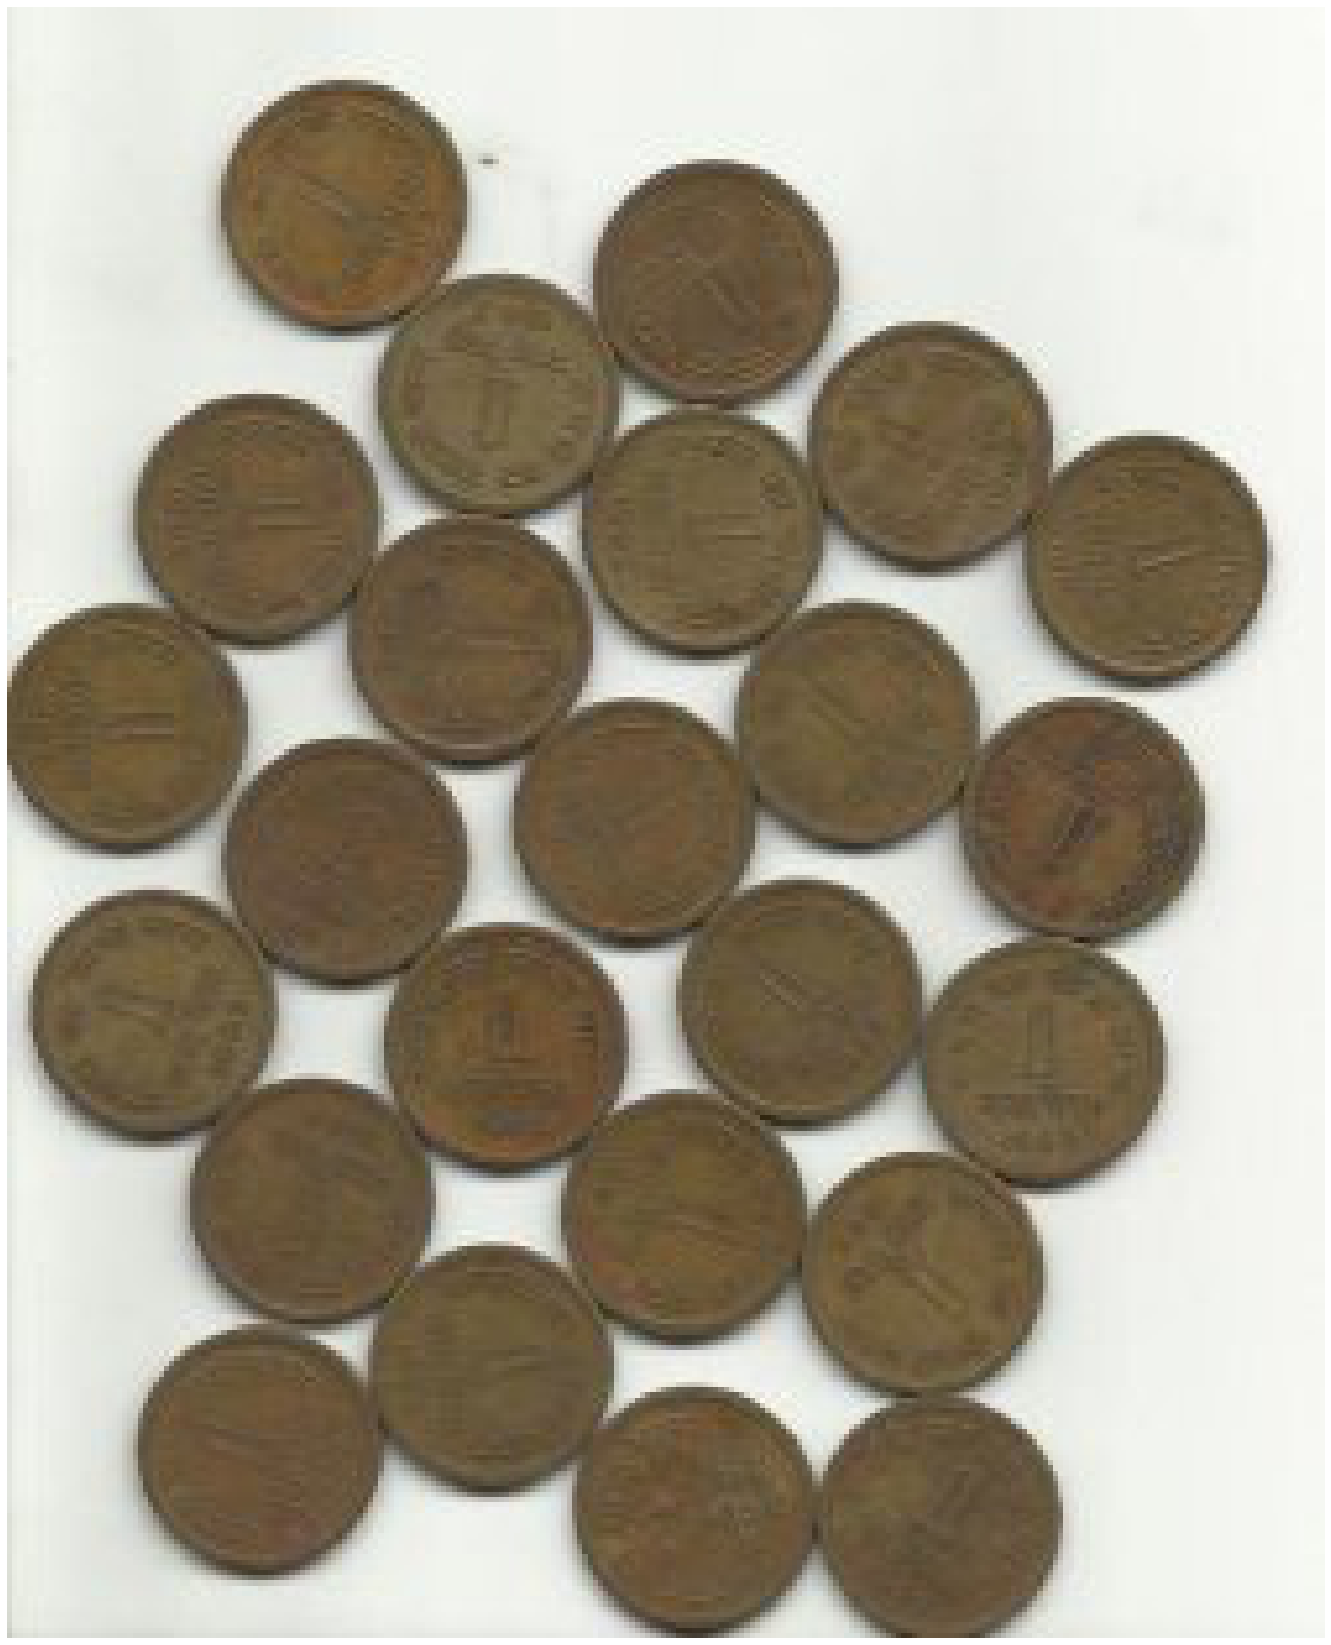

In [1]:
from utils import *

import cv2

%matplotlib inline
img = cv2.imread(os.path.join(img_src,'water_coins.jpeg'))
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_show(image)

In [2]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)


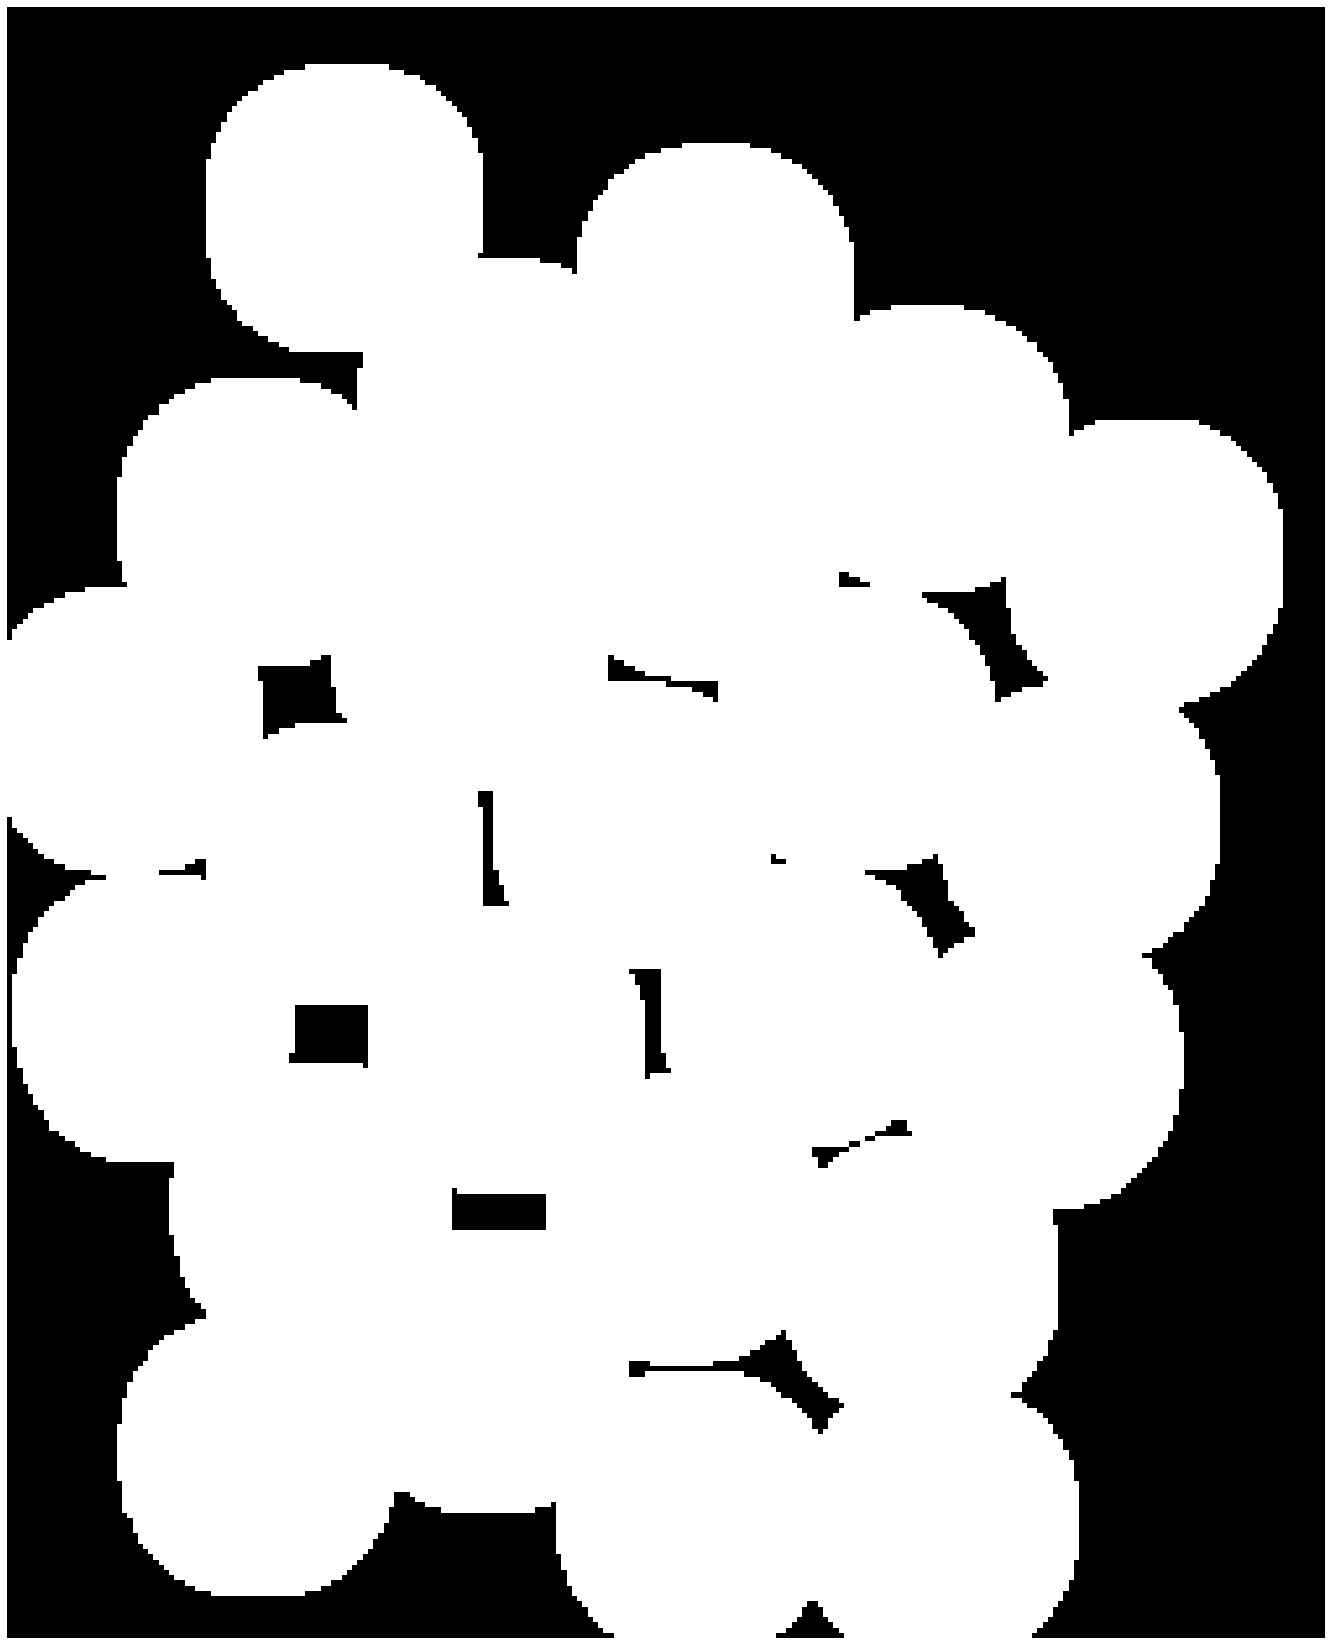

In [3]:
img_show(sure_bg,cmap=cm.gray)

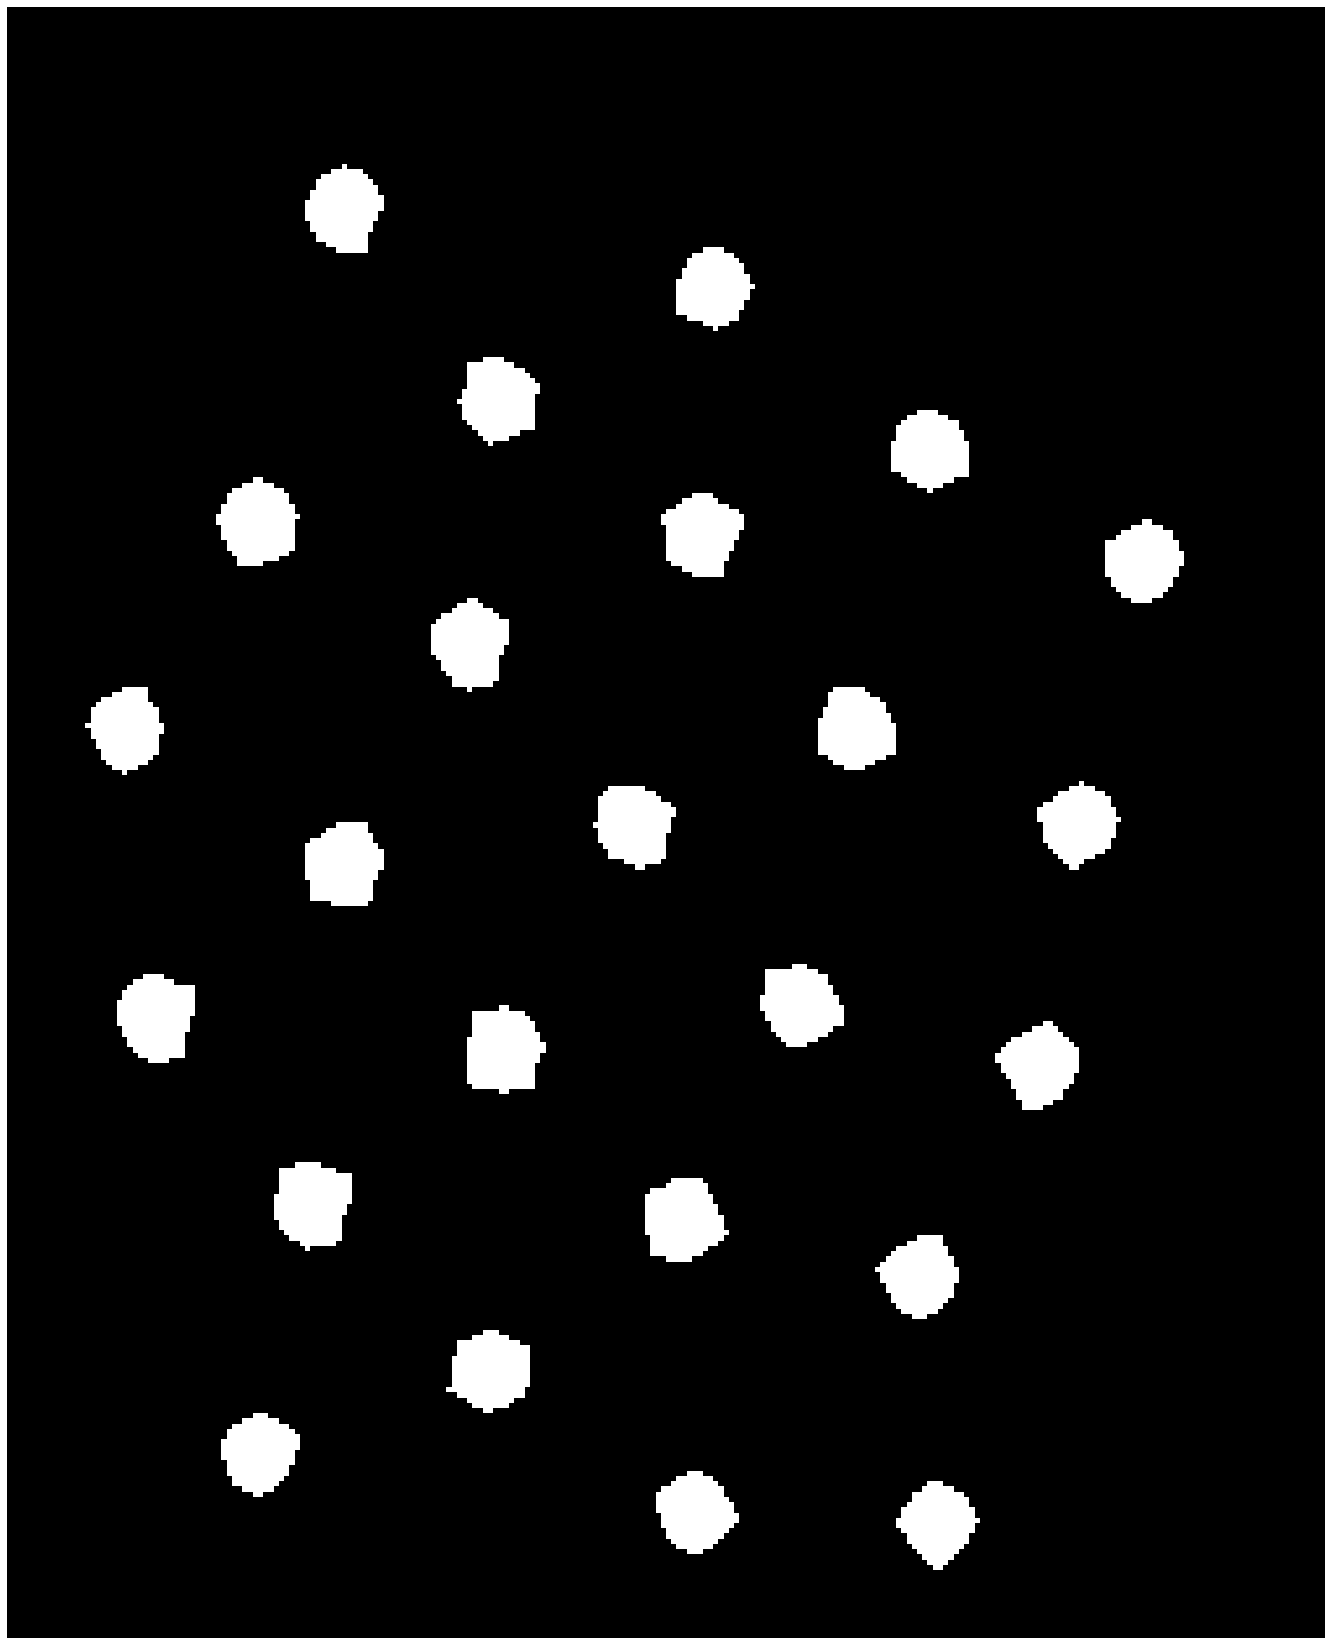

In [4]:
img_show(sure_fg,cmap=cm.gray)

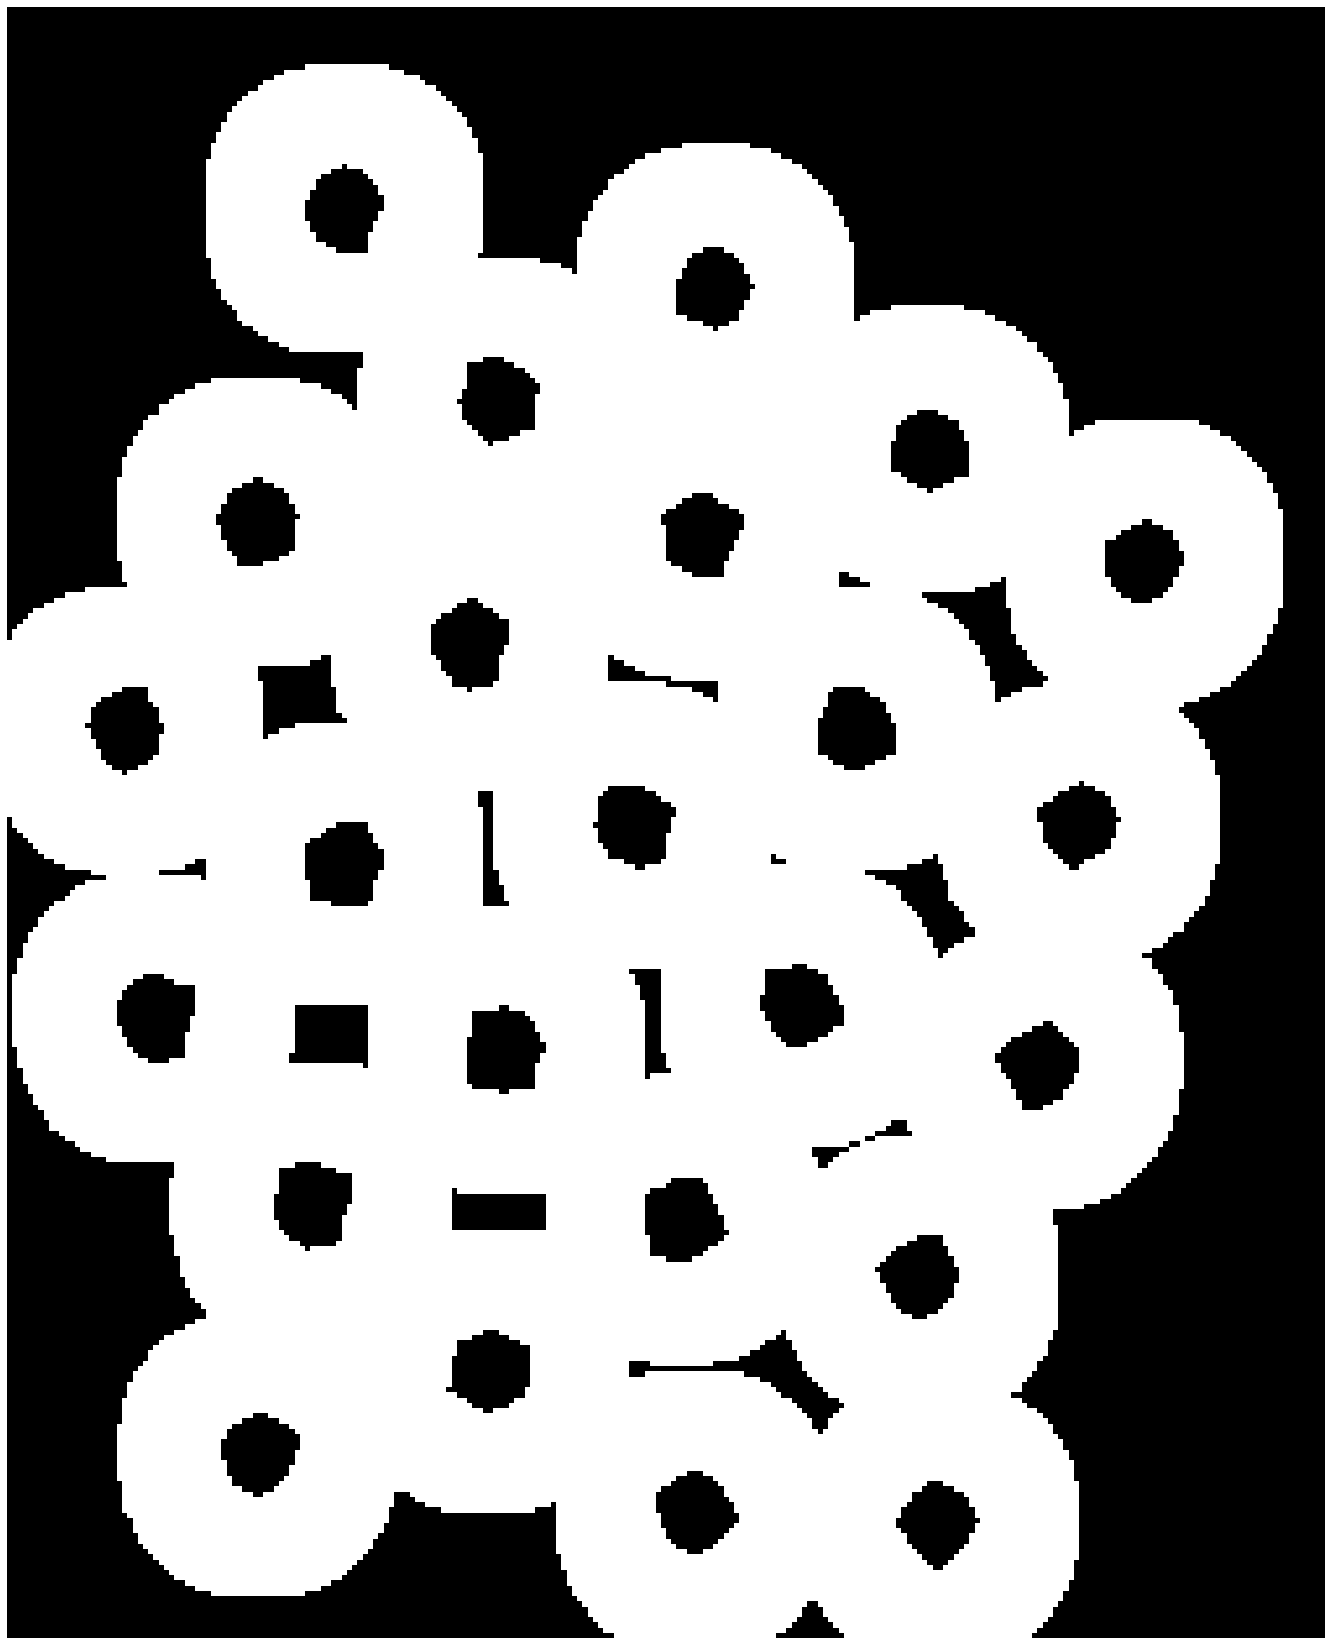

In [5]:
img_show(unknown,cmap=cm.gray)

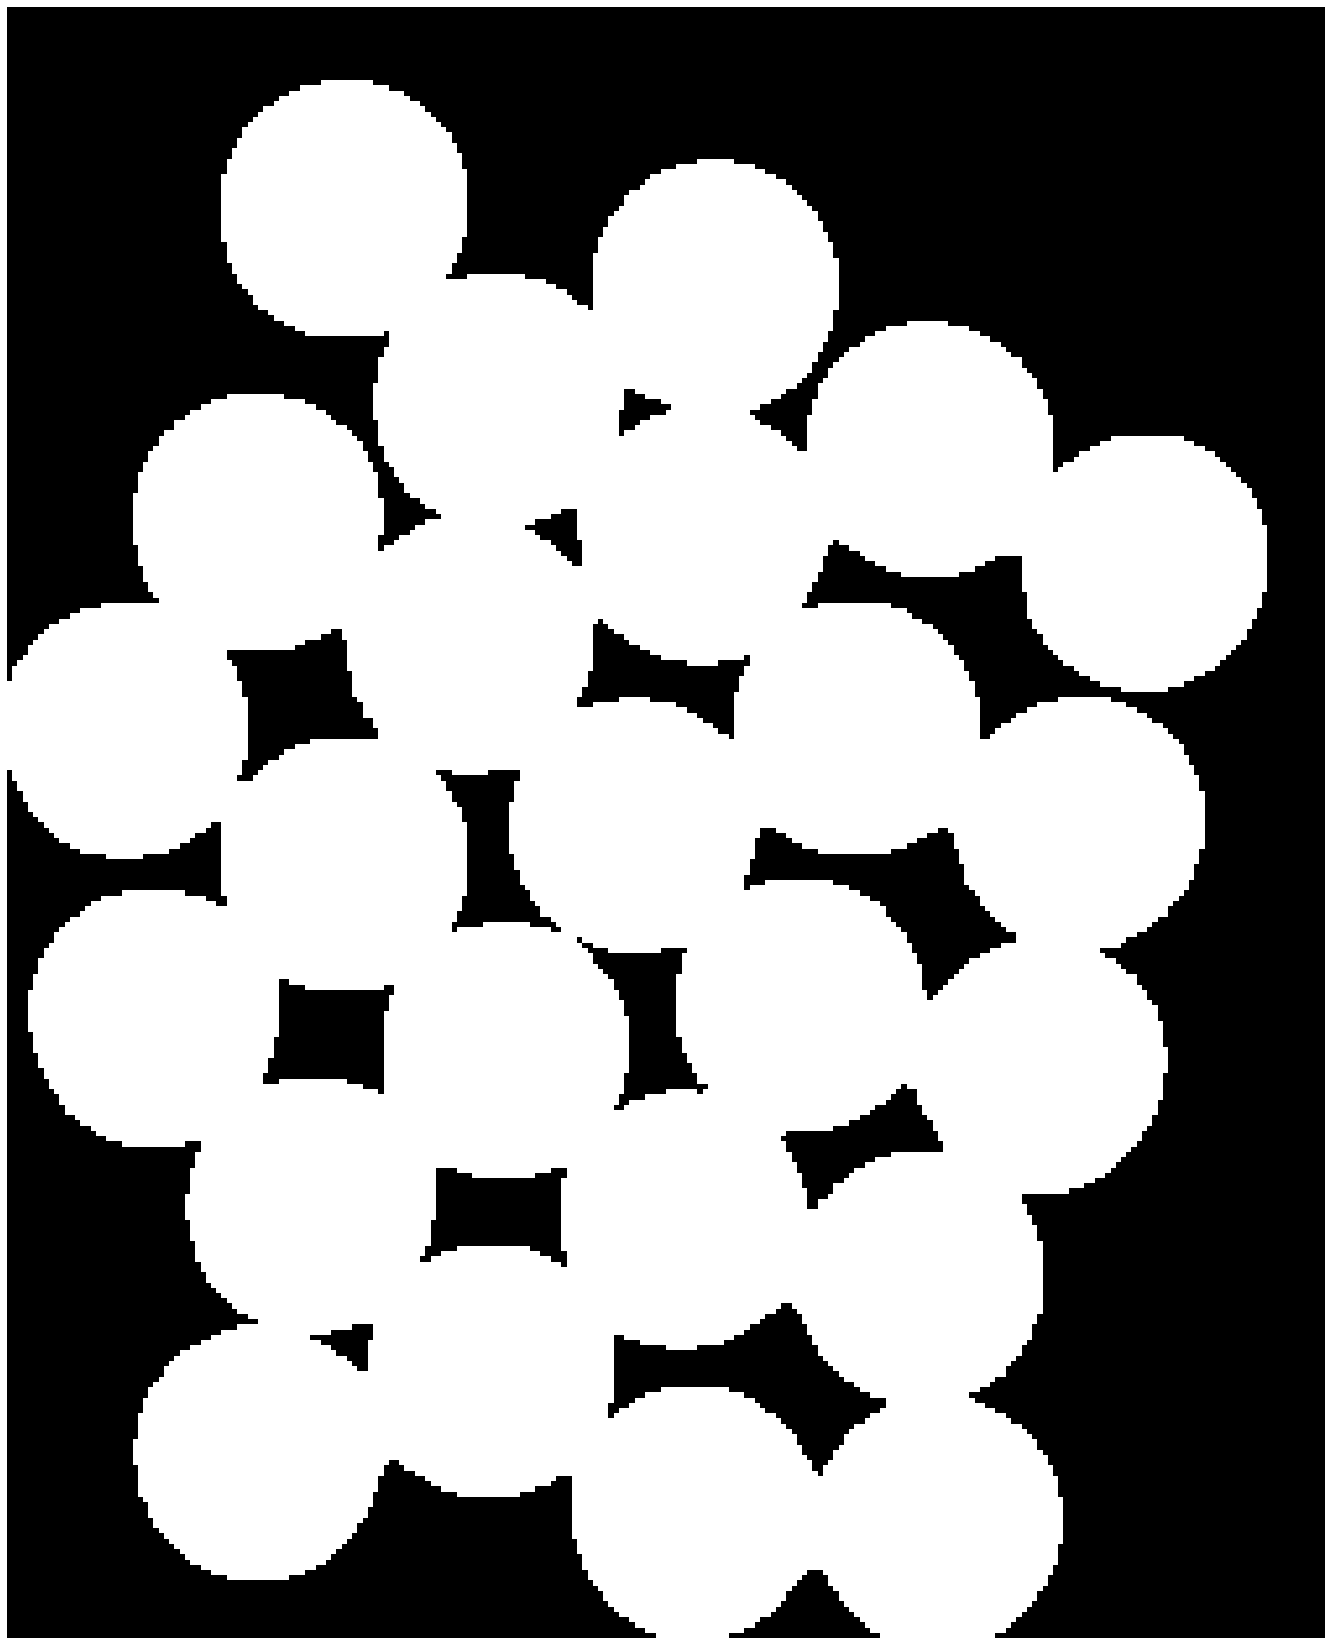

In [6]:
img_show(opening,cmap=cm.gray)

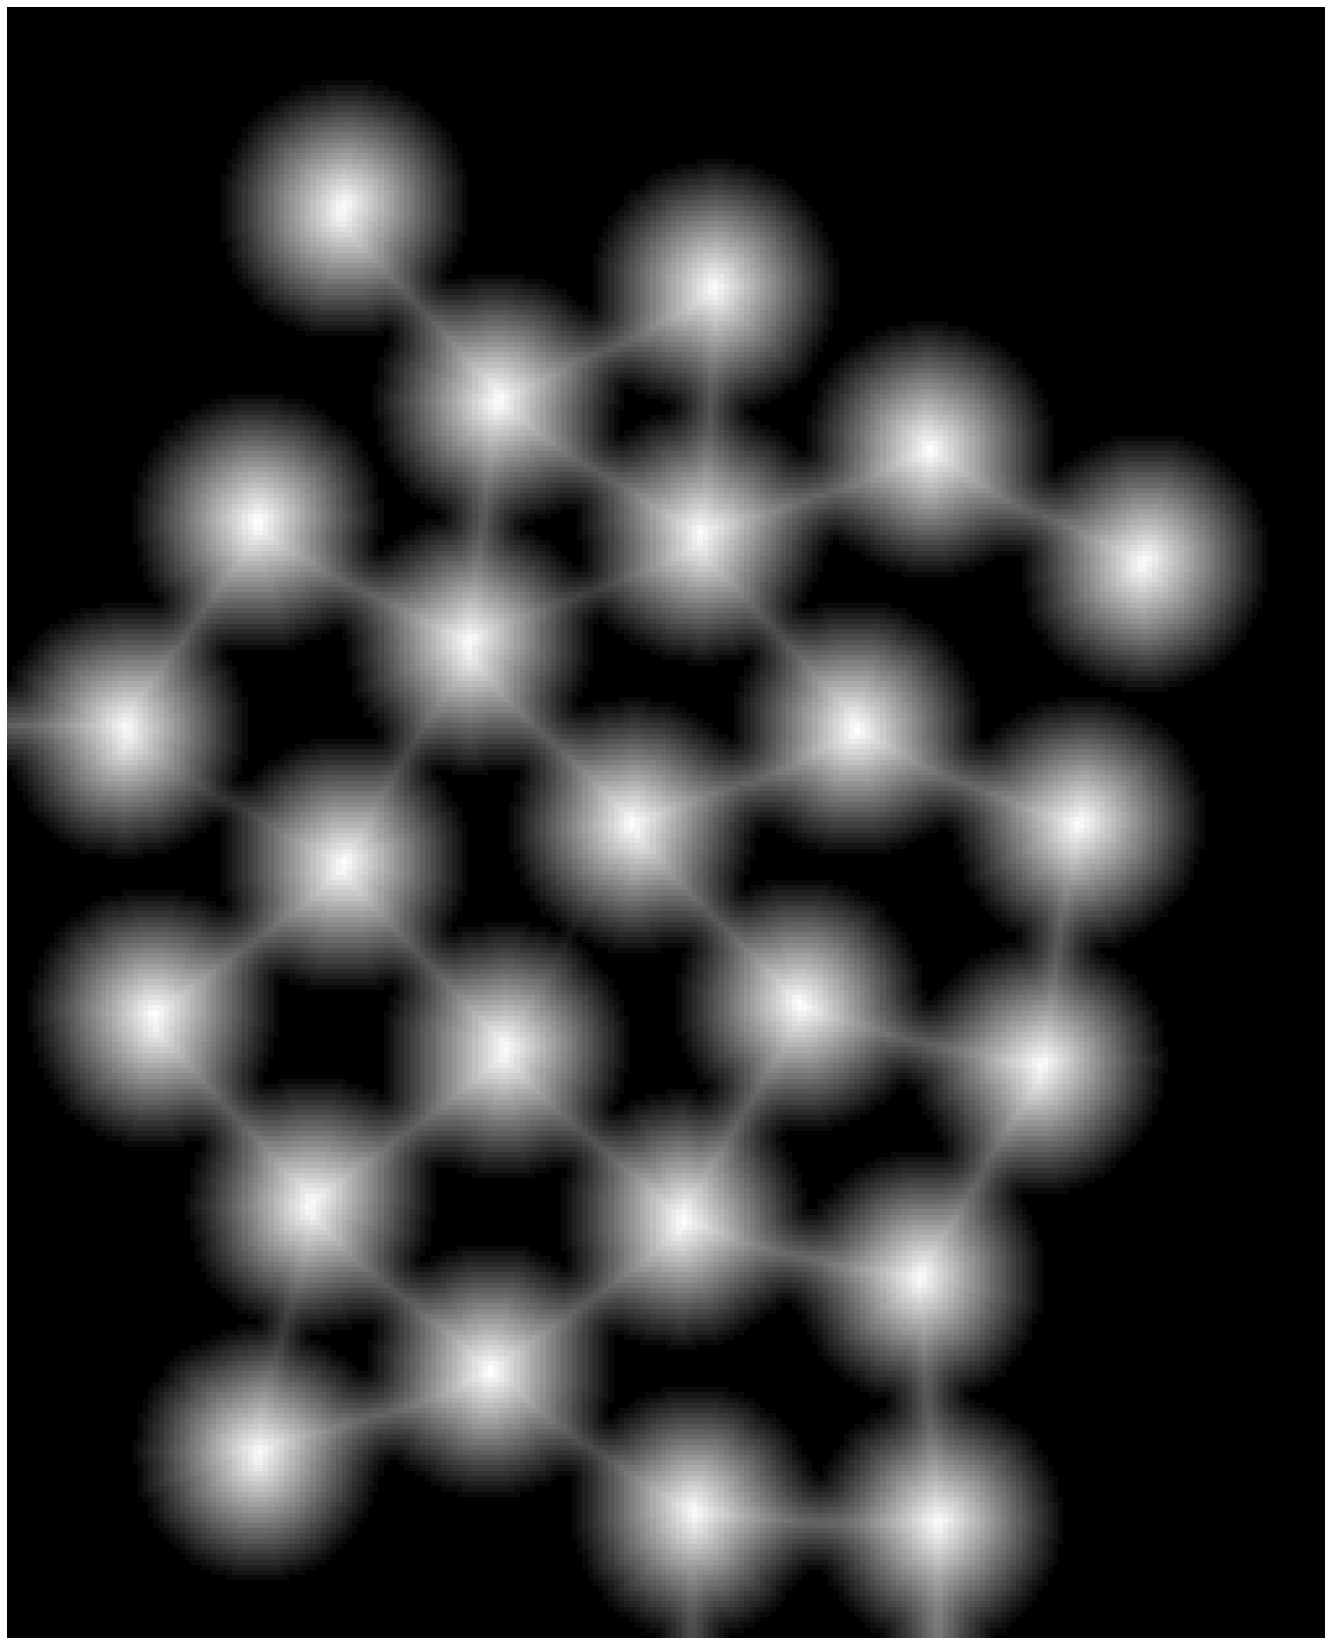

In [7]:
img_show(dist_transform,cmap=cm.gray)

In [8]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

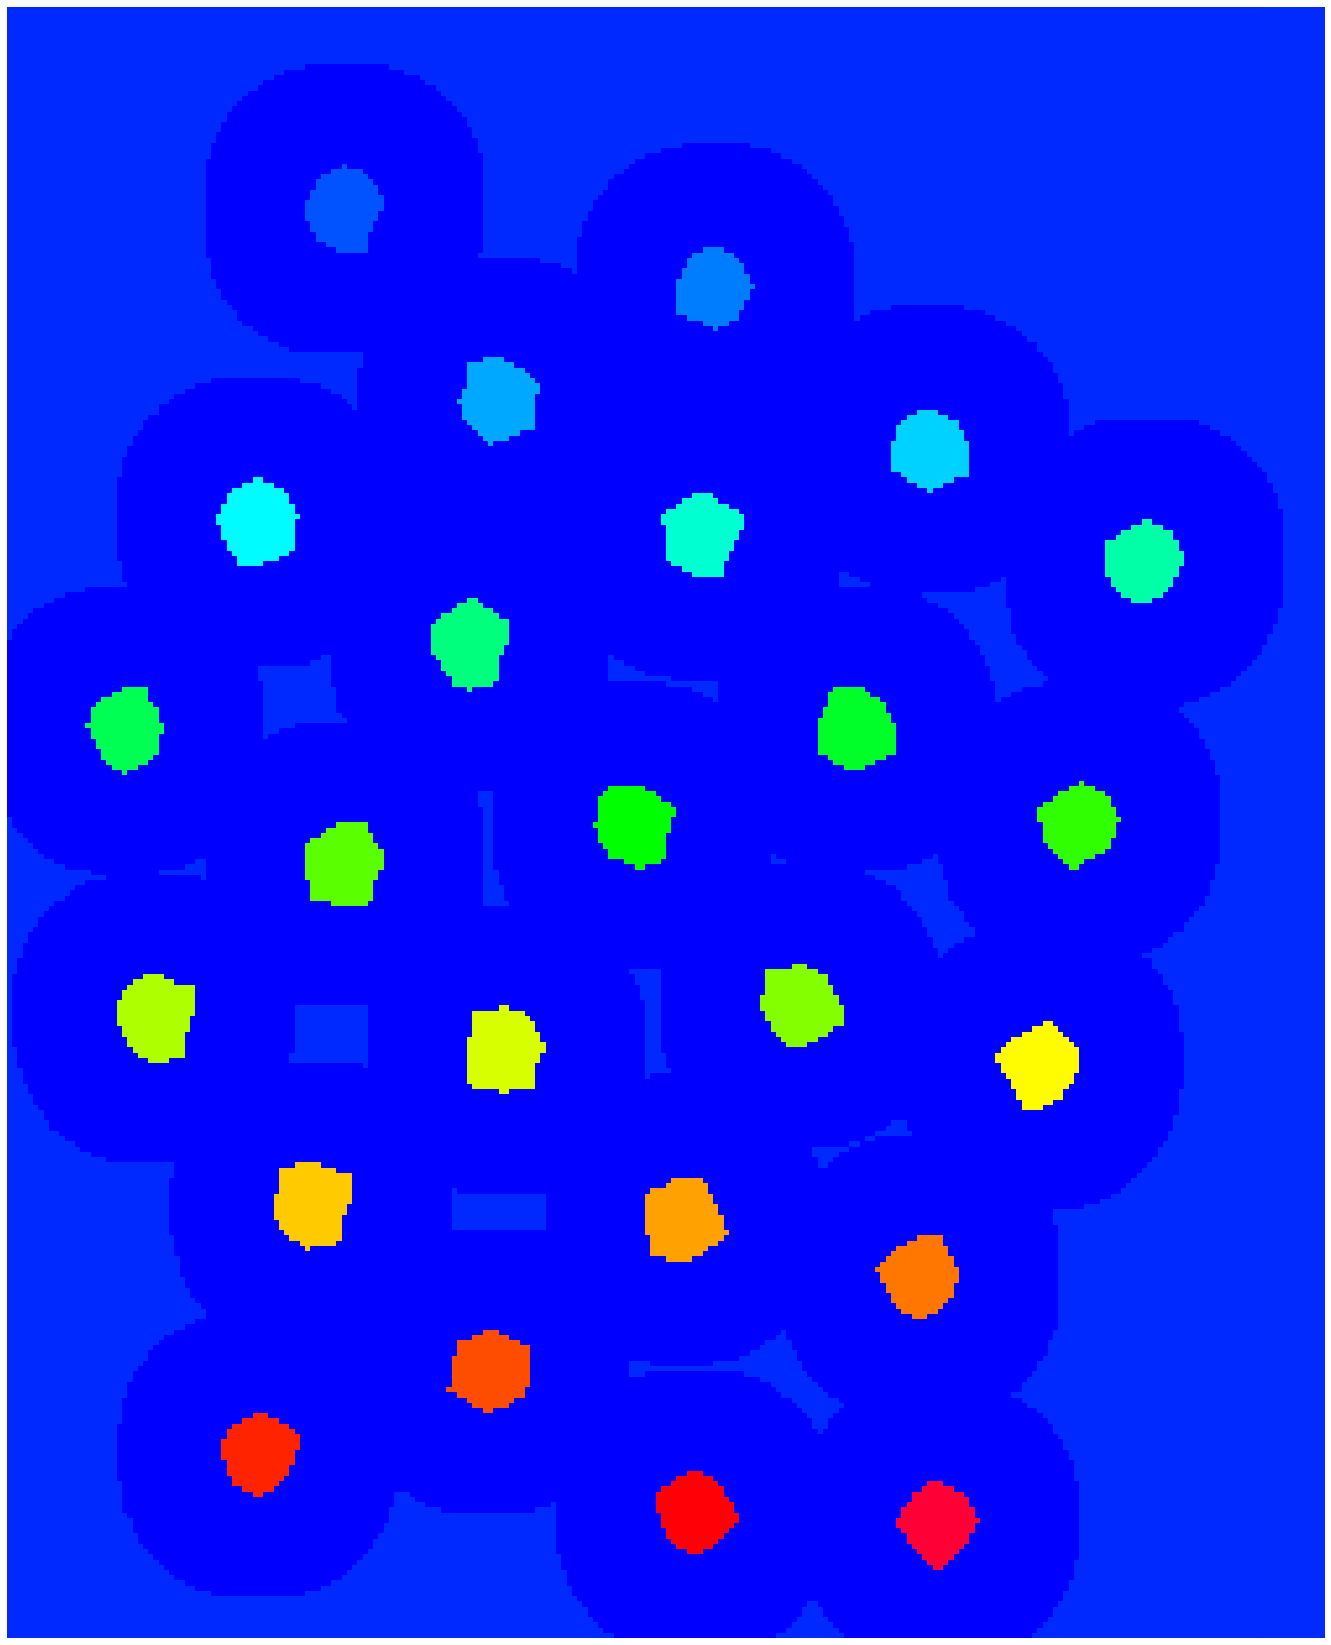

In [9]:
label_hue = np.uint8(179*markers/np.max(markers))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

# cvt to BGR for display
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR_FULL)

# set bg label to black
#labeled_img[label_hue==0] = 0

img_show(labeled_img)

In [10]:
markers = cv2.watershed(image,markers)
image[markers == -1] = [255,0,0]

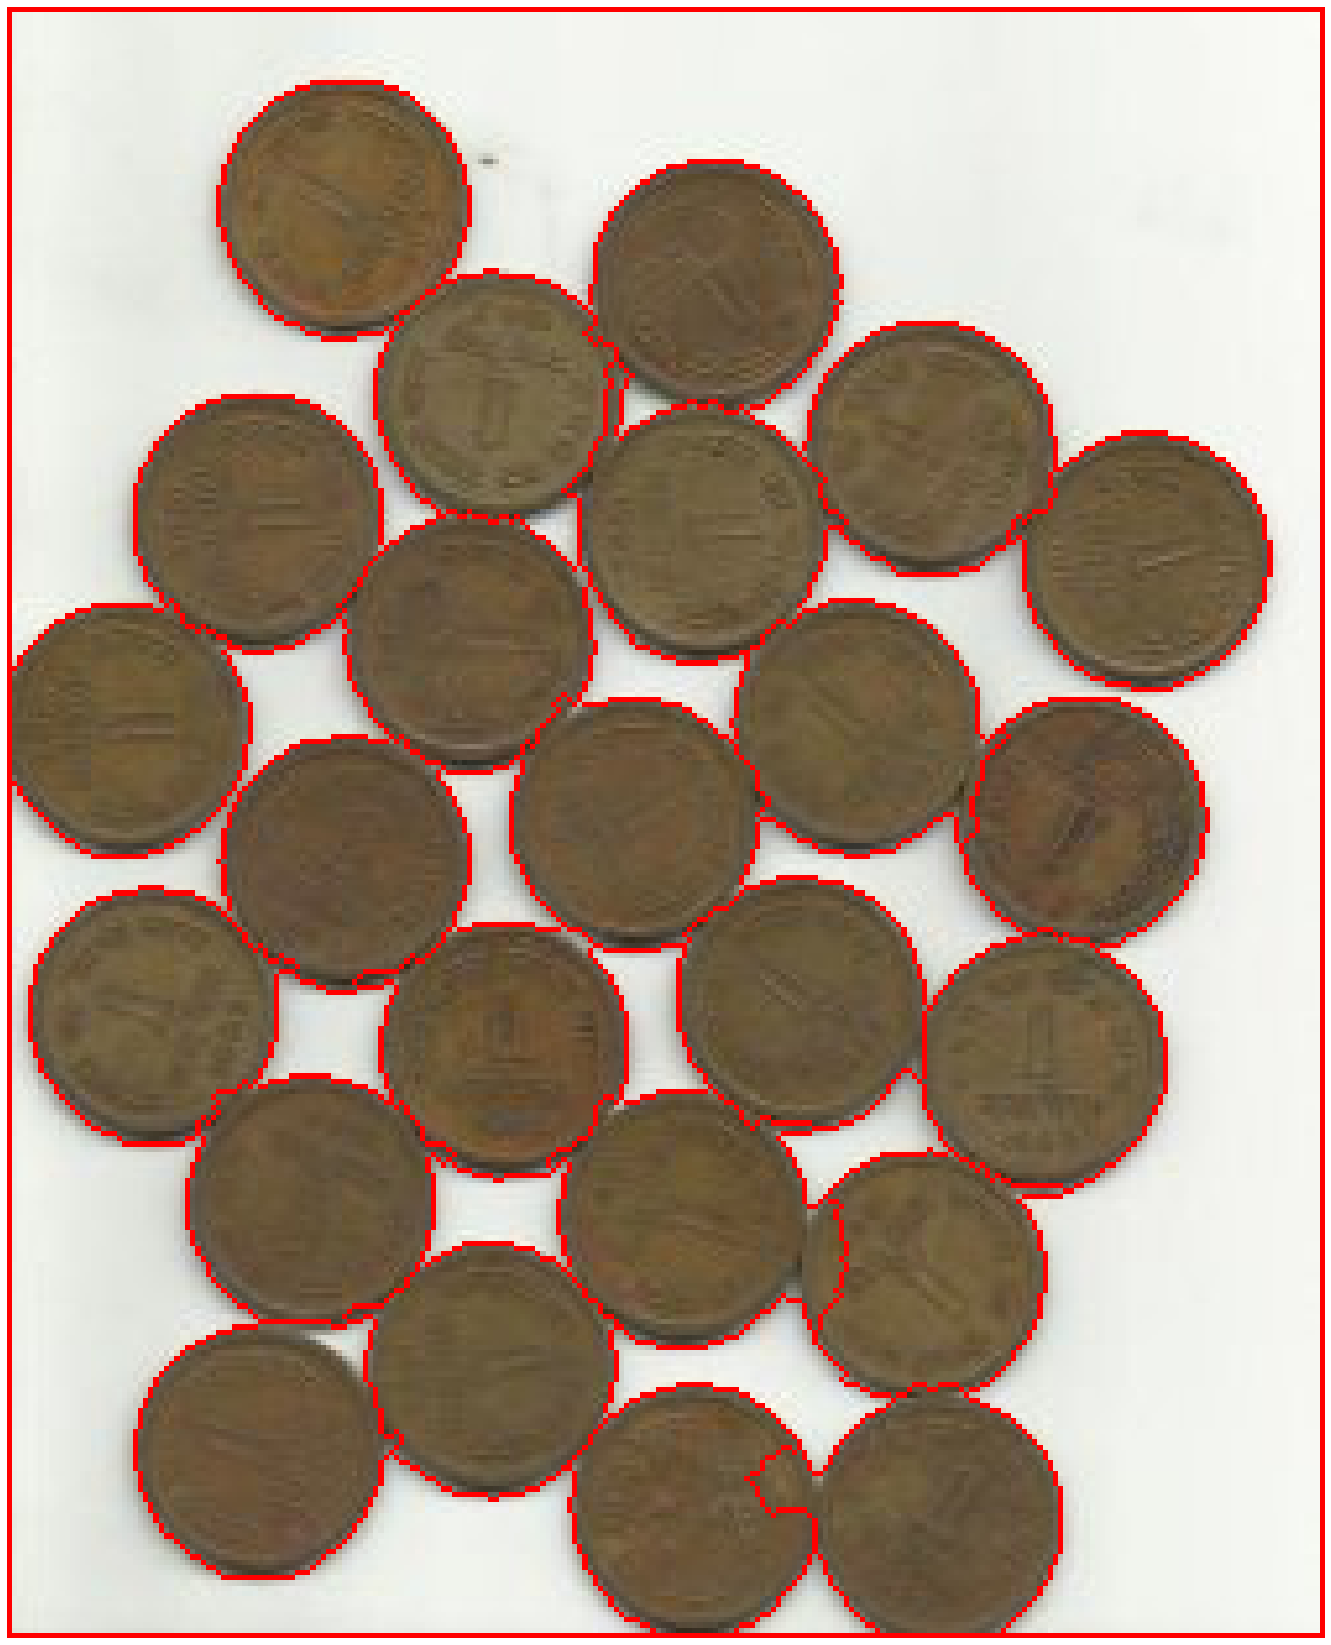

In [11]:
img_show(image)